# Teoría cuántica básica, observables y medidas 

- Angie Julieth Ramos Cortes
- CNYT-2
- Teoría cuántica básica, observables y medidas
- 22 octubre 2024
 
Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.


In [1]:
import numpy as np

def main():
#Ejemplo de uso transición con números complejos
    ket = np.array([0.5+0.2j, 0.3-0.1j, 0.0 + 0.4j, 0.1+0.3j, 0.1-0.2j])
    pos = 2
    resultado = propabilidad(ket, pos)
    print("La probabilidad de encontrar el vector ket en una posición específica es: ", resultado)

def propabilidad(ket, pos):
    amplitud = ket[pos]
    probabilidad = np.abs(amplitud)**2
    return probabilidad

main()

La probabilidad de encontrar el vector ket en una posición específica es:  0.16000000000000003


2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.


In [2]:
import numpy as np

def main():
#Ejemplo de uso transición con números complejos
    ket_inicial = np.array([0.2+0.3j, 0.1-0.4j, 0.0+0.5j, 0.3-0.2j])
    ket_final = np.array([0.1-0.1j, 0.2+0.2j, 0.1-0.3j, 0.4+0.4j])
    resultado = calcula_transicion(ket_inicial, ket_final)
    print("La probabilidad de transitar un vector ket al otro es: ", resultado)

def calcula_transicion(ket_inicial, ket_final):
    producto_interno = np.vdot(ket_inicial, ket_final)
    transicion = np.abs(producto_interno)**2
    return transicion

main()

La probabilidad de transitar un vector ket al otro es:  0.07240000000000002


### Complete los retos de programación del capítulo 4.
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [3]:
def main():
    vector1 = np.array([1 + 20j, 3 - 1j])
    vector2 = np.array([2 - 1j, 1 + 30j])
    resultado = amplitud_transicion(vector1, vector2)
    print("La probabilidad de transitar de el uno al otro después de hacer la observación es de: ", resultado)

def amplitud_transicion(vector1, vector2):
    transicion = np.dot(np.conjugate(vector1), vector2)
    return np.abs(transicion)**2

main()

La probabilidad de transitar de el uno al otro después de hacer la observación es de:  4525.000000000001


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [4]:
import numpy as np

def main():
    matriz = np.array([[3 + 1j, 2 - 1j], [2 - 1j, 1 - 2j]])  # Matriz hermitiana
    estado = np.array([1 + 0j, 1 - 1j])
    media, varianza = calcular_media_varianza(matriz, estado)
    print("La media calculada es:", media)
    print("La varianza es:", varianza)

def calcular_media_varianza(matriz, estado):
    if np.allclose(matriz, np.conjugate(np.transpose(matriz))):
        media = np.dot(np.conjugate(estado), np.dot(matriz, estado))
        varianza = np.dot(np.conjugate(estado), np.dot(matriz**2, estado)) - np.abs(media)**2
        return np.real(media), np.real(varianza)  # Devolvemos la parte real de la media y la varianza
    else:
        return None, None

main()

La media calculada es: None
La varianza es: None


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [5]:
import numpy as np

def main():
    matriz = np.array([[1 + 1j, 2 - 1j], [2 - 1j, 3 - 2j]]) 
    estado = np.array([1 + 0j, 0 - 1j])
    valores_propios, probabilidad_transicion = calcular_valores_propios_probabilidad(matriz, estado)
    print("Valores propios:", valores_propios)
    print("Probabilidad de transición:", probabilidad_transicion)

def calcular_valores_propios_probabilidad(matriz, estado):
    if np.allclose(matriz, np.conjugate(np.transpose(matriz))):
        valores_propios, vectores_propios = np.linalg.eigh(matriz)
        proyeccion = np.outer(vectores_propios.conj(), vectores_propios)
        probabilidad_transicion = np.abs(np.vdot(estado, np.dot(proyeccion, estado)))**2
        return valores_propios, probabilidad_transicion
    else:
        return None, None

main()

Valores propios: None
Probabilidad de transición: None


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [6]:
import numpy as np

def main():
    matriz_operacion1 = np.array([[1 + 1j, 0],
                                [0, 1 - 1j]])
    matriz_operacion2 = np.array([[1 - 1j, 2 + 1j],
                                [0, 1 + 2j]])
    matrices = [matriz_operacion1, matriz_operacion2]
    estado_inicial = np.array([1 + 0j, 0 - 1j])  # Definir el estado inicial
    estado_final = evolucion_dinamica(matrices, estado_inicial)  # Pasar 'matrices' en lugar de 'matrices_operacion'
    print("Estado final después de la dinámica del sistema:", estado_final)

def evolucion_dinamica(matrices, estado_inicial):
    estado_actual = estado_inicial
    for matriz_operacion in matrices:
        estado_actual = np.dot(matriz_operacion, estado_actual)
    return estado_actual

main()

Estado final después de la dinámica del sistema: [1.-3.j 1.-3.j]


### Realice los siguientes problemas e incluyalos como ejemplos

Modele en su librería los problemas: 
- 4.3.1

In [7]:
import numpy as np

def ej1(observation):
    spin_up = np.array([1, 0])  
    aplica = np.dot(observation, spin_up)
    suma = np.sum(aplica)
    return suma
observacion = np.array([[0, 1], [1, 0]]) 
resultado = ej1(observacion)
print("Resultado:", resultado)

Resultado: 1


- 4.3.2

Probabilidad de colapso en |e1>: 0.9978530000000002
Probabilidad de colapso en |e2>: 0.9978530000000002


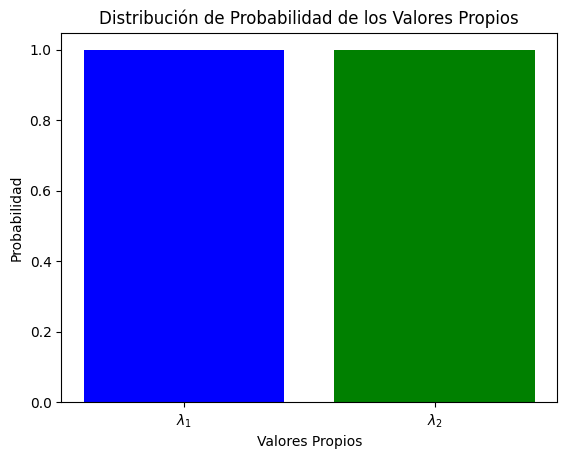

In [11]:
import numpy as np

# Definir los vectores propios
e1 = np.array([-0.923j, -0.382])
e2 = np.array([-0.382j, 0.923])

# Definir el estado inicial |psi> = [1, 1]
psi = np.array([1, 1])

# Función para calcular la probabilidad de colapso en un vector propio
def probabilidad_colapso(vector_propio, psi):
    producto_interno = np.vdot(vector_propio, psi)  # Producto interno
    probabilidad = np.abs(producto_interno)**2      # Probabilidad
    return probabilidad

# Calcular las probabilidades de colapso en los vectores propios
P1 = probabilidad_colapso(e1, psi)
P2 = probabilidad_colapso(e2, psi)

# Mostrar los resultados
print(f"Probabilidad de colapso en |e1>: {P1}")
print(f"Probabilidad de colapso en |e2>: {P2}")

# Dibujar la distribución de probabilidad
import matplotlib.pyplot as plt

# Valores propios
eigenvalues = [r'$\lambda_1$', r'$\lambda_2$']
probabilities = [P1, P2]

# Crear el gráfico de barras
plt.bar(eigenvalues, probabilities, color=['blue', 'green'])

# Título y etiquetas
plt.title('Distribución de Probabilidad de los Valores Propios')
plt.xlabel('Valores Propios')
plt.ylabel('Probabilidad')

# Mostrar gráfico
plt.show()


- 4.4.1

In [9]:
import numpy as np
U1 = np.array([[0, 1], 
               [1, 0]])
U2 = np.array([[0.5**0.5, 0.5**0.5], 
               [-0.5**0.5, 0.5**0.5]])
def es_unitaria(matriz):
    return np.allclose(np.eye(len(matriz)), matriz.dot(matriz.T.conj()))
print(f"U1 es unitaria: {es_unitaria(U1)}")
print(f"U2 es unitaria: {es_unitaria(U2)}")
producto = np.dot(U1, U2)
print(f"El producto de U1 y U2 es unitario: {es_unitaria(producto)}")

U1 es unitaria: True
U2 es unitaria: True
El producto de U1 y U2 es unitario: True


- 4.4.2

In [10]:
import numpy as np

U = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
              [1/np.sqrt(2), 0, 0, -1/np.sqrt(2)],
              [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
              [0, -1/np.sqrt(2), 1/np.sqrt(2), 0]])

estado_inicial = np.array([1, 0, 0, 0]).T

estado_final = np.linalg.matrix_power(U, 3).dot(estado_inicial)

probabilidad_en_punto_3 = abs(estado_final[3])**2

print("El estado del sistema después de tres pasos de tiempo es:", estado_final)
print("La probabilidad de encontrar la bola cuántica en el punto-3 es:", probabilidad_en_punto_3)

El estado del sistema después de tres pasos de tiempo es: [0.         0.70710678 0.70710678 0.        ]
La probabilidad de encontrar la bola cuántica en el punto-3 es: 0.0


### Desarrolle e incluya en el Github una discusión de los ejercicios:

- 4.5.2
#### Discusión
Este ejercicio demuestra cómo los sistemas cuánticos con múltiples partículas se pueden describir mediante combinaciones lineales de estados base. La estructura de estos estados es la base para tecnologías como los registros cuánticos y circuitos cuánticos, donde el número de posibles combinaciones crece exponencialmente con el número de partículas. Este crecimiento exponencial es una de las claves que hacen que la computación cuántica sea tan poderosa en comparación con la computación clásica.

Este tema es fundamental en el campo de la información cuántica, ya que permite explotar las propiedades de la superposición y el entrelazamiento para resolver problemas complejos de manera eficiente.

In [12]:
import numpy as np

# Función para generar un estado aleatorio de n partículas con espín
def estado_cuantico_n_particulas(n):
    # El número total de estados posibles es 2^n
    num_estados = 2**n
    # Generamos amplitudes aleatorias (números complejos)
    amplitudes = np.random.rand(num_estados) + 1j * np.random.rand(num_estados)
    # Normalizamos el estado
    amplitudes /= np.linalg.norm(amplitudes)
    return amplitudes

# Ejemplo: generar un estado cuántico para n = 3 partículas
n = 3
estado = estado_cuantico_n_particulas(n)

# Mostrar el estado cuántico generado
print(f"Estado cuántico de {n} partículas con espín:\n", estado)


Estado cuántico de 3 partículas con espín:
 [0.28380355+3.06836051e-04j 0.07136567+6.41183049e-02j
 0.20360985+2.52612679e-01j 0.19690987+3.30513972e-01j
 0.33225627+2.75505274e-01j 0.24432439+2.25370320e-01j
 0.21455013+2.90339627e-01j 0.4129876 +2.43509602e-01j]


# Discusión del Ejercicio 4.5.3

## Enunciado del Ejercicio

Supongamos el mismo escenario que en el Ejemplo 4.5.2 y consideremos el estado cuántico:

\[
|\psi\rangle = |x_0\rangle |y_1\rangle + |x_1\rangle |y_1\rangle.
\]

¿Es este estado separable?

## Discusión

Para determinar si el estado \( |\psi\rangle = |x_0\rangle |y_1\rangle + |x_1\rangle |y_1\rangle \) es separable, debemos analizar si podemos escribirlo como el producto tensorial de dos estados provenientes de los subsistemas individuales. Recordemos que un estado separable puede descomponerse de la siguiente manera:

\[
|\psi\rangle = (c_0 |x_0\rangle + c_1 |x_1\rangle) \otimes (d_0 |y_0\rangle + d_1 |y_1\rangle),
\]

donde \( c_0, c_1, d_0 \), y \( d_1 \) son coeficientes que describen las amplitudes de probabilidad de cada estado base en el producto tensorial.

## Verificación del Producto Tensorial

Dado que \( |\psi\rangle = |x_0\rangle |y_1\rangle + |x_1\rangle |y_1\rangle \), podemos intentar expresar el estado como el producto tensorial de dos estados. Observamos que:

\[
|\psi\rangle = |y_1\rangle \otimes (|x_0\rangle + |x_1\rangle).
\]

En esta forma, podemos ver que el estado del subsistema que corresponde a la segunda partícula, \( |y_1\rangle \), es el mismo en ambas partes de la superposición, mientras que el subsistema correspondiente a la primera partícula es una superposición de \( |x_0\rangle \) y \( |x_1\rangle \). Esto implica que el estado puede factorizarse en el siguiente producto tensorial:

\[
|\psi\rangle = (|x_0\rangle + |x_1\rangle) \otimes |y_1\rangle.
\]

Por lo tanto, hemos expresado el estado \( |\psi\rangle \) como un producto tensorial de dos estados provenientes de los subsistemas, lo que nos permite concluir que **el estado es separable**.

## Conclusión

El estado dado en el ejercicio, \( |\psi\rangle = |x_0\rangle |y_1\rangle + |x_1\rangle |y_1\rangle \), puede descomponerse como el producto tensorial \( (|x_0\rangle + |x_1\rangle) \otimes |y_1\rangle \). Por lo tanto, **el estado es separable** y no está entrelazado. Esto contrasta con el estado entrelazado discutido en el Ejemplo 4.5.2, donde no fue posible factorizar el estado en un producto tensorial de los subsistemas. 

Los estados separables, como este, no exhiben correlaciones cuánticas entre los subsistemas después de una medición, ya que cada uno de ellos puede describirse independientemente del otro.
